### 2021_10_25_5

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # seaborn 보다 고급 시각화 가능. but 코드 복잡
import seaborn as sns      # seaborn은 matplotlib보다 간단하게 사용 가능
import os
for dirname, _, filenames in os.walk('../CSV/bike-sharing-demand/'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

../CSV/bike-sharing-demand/.DS_Store
../CSV/bike-sharing-demand/sampleSubmission.csv
../CSV/bike-sharing-demand/test.csv
../CSV/bike-sharing-demand/04_sub.csv
../CSV/bike-sharing-demand/01_sub.csv
../CSV/bike-sharing-demand/03_sub.csv
../CSV/bike-sharing-demand/train.csv
../CSV/bike-sharing-demand/02_sub.csv


In [2]:
train = pd.read_csv("../CSV/bike-sharing-demand/train.csv",parse_dates=['datetime'])
test = pd.read_csv("../CSV/bike-sharing-demand/test.csv",parse_dates=['datetime'])
sub = pd.read_csv("../CSV/bike-sharing-demand/sampleSubmission.csv")

print("train shape : {}".format(train.shape))
print("test shape : {}".format(test.shape))
print("sub shape : {}".format(sub.shape))

train shape : (10886, 12)
test shape : (6493, 9)
sub shape : (6493, 2)


In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 1020.7 KB


In [4]:
train.head(3)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32


(array([4284., 2337., 1686., 1067.,  633.,  426.,  233.,  116.,   85.,
          19.]),
 array([  1. ,  98.6, 196.2, 293.8, 391.4, 489. , 586.6, 684.2, 781.8,
        879.4, 977. ]),
 <BarContainer object of 10 artists>)

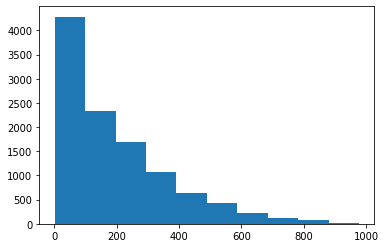

In [5]:
plt.hist(train["count"])

In [6]:
new_train = train.copy()
new_test = test.copy()

### 파생변수

In [7]:
new_train["year"] = new_train["datetime"].dt.year
new_train["month"] = new_train["datetime"].dt.month
new_train["day"] = new_train["datetime"].dt.day
new_train["hour"] = new_train["datetime"].dt.hour
new_train["minute"] = new_train["datetime"].dt.minute
new_train["second"] = new_train["datetime"].dt.second
new_train["dayofweek"] = new_train["datetime"].dt.dayofweek

new_test["year"] = new_test["datetime"].dt.year
new_test["month"] = new_test["datetime"].dt.month
new_test["day"] = new_test["datetime"].dt.day
new_test["hour"] = new_test["datetime"].dt.hour
new_test["minute"] = new_test["datetime"].dt.minute
new_test["second"] = new_test["datetime"].dt.second
new_test["dayofweek"] = new_test["datetime"].dt.dayofweek

In [8]:
new_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 19 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
 12  year        10886 non-null  int64         
 13  month       10886 non-null  int64         
 14  day         10886 non-null  int64         
 15  hour        10886 non-null  int64         
 16  minute      10886 non-

In [10]:
feature_names = ['season', 'holiday', 'workingday', 'weather', 
                  'temp', 'atemp', 'humidity', 'windspeed', 
                  "year", "month", "hour", "dayofweek"]  # 공통 변수

X_train_all = new_train[feature_names]  # 학습용 데이터 변수 선택
X_test_all = new_test[feature_names]    # 테스트 데이터의 변수 선택 

label_name = 'count'                    # 렌탈 대수 (종속변수)
y_train_all = new_train[label_name]     # 렌탈 대수 변수 값 선택

### 여러 모델 비교

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor   # 앙상블(의사결정트리 확장판)
from sklearn.ensemble import GradientBoostingRegressor

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X_train_all, 
                                                    y_train_all,
                                                    test_size=0.3,
                                                    random_state=77)

In [13]:
model = LinearRegression()     # 모델 객체 생성
model.fit(X_train, y_train)    # 모델 학습

# 정확도 확인
print("LinearRegression")
print("학습용 세트 정확도: {:.3f}".format(model.score(X_train, y_train)))
print("테스트 세트 정확도: {:.3f}".format(model.score(X_test, y_test)))
print()

model = DecisionTreeRegressor()  # 모델 객체 생성
model.fit(X_train, y_train)      # 모델 학습

# 정확도 확인
print("DecisionTreeRegressor")
print("학습용 세트 정확도: {:.3f}".format(model.score(X_train, y_train)))
print("테스트 세트 정확도: {:.3f}".format(model.score(X_test, y_test)))
print()

model = RandomForestRegressor(n_jobs = -1, random_state = 37)  # 모델 객체 생성
model.fit(X_train, y_train)                                    # 모델 학습

# 정확도 확인
print("RandomForestRegressor")
print("학습용 세트 정확도: {:.3f}".format(model.score(X_train, y_train)))
print("테스트 세트 정확도: {:.3f}".format(model.score(X_test, y_test)))
print()

model = GradientBoostingRegressor(random_state = 37)  # 모델 객체 생성.
model.fit(X_train, y_train)                           # 모델 학습

# 정확도 확인
print("GradientBoostingRegressor")
print("학습용 세트 정확도: {:.3f}".format(model.score(X_train, y_train)))
print("테스트 세트 정확도: {:.3f}".format(model.score(X_test, y_test)))

LinearRegression
학습용 세트 정확도: 0.393
테스트 세트 정확도: 0.377

DecisionTreeRegressor
학습용 세트 정확도: 1.000
테스트 세트 정확도: 0.896

RandomForestRegressor
학습용 세트 정확도: 0.992
테스트 세트 정확도: 0.951

GradientBoostingRegressor
학습용 세트 정확도: 0.878
테스트 세트 정확도: 0.869


In [14]:
model = RandomForestRegressor(n_jobs = -1, random_state = 37)  # 모델 객체 생성
model.fit(X_train, y_train)                                    # 모델 학습 

# 정확도 확인
print("RandomForestRegressor")
print("학습용 세트 정확도: {:.3f}".format(model.score(X_train, y_train)))
print("테스트 세트 정확도: {:.3f}".format(model.score(X_test, y_test)))
print()

pred = model.predict(X_test_all)
pred[:10]

RandomForestRegressor
학습용 세트 정확도: 0.992
테스트 세트 정확도: 0.951



array([ 10.7 ,   4.53,   5.1 ,   3.63,   2.86,   4.37,  35.11,  94.47,
       183.77, 120.12])

### 제출 파일 생성

In [15]:
sub["count"] = pred
sub.loc[sub["count"] < 0, "count"] = 0
sub.to_csv("../CSV/bike-sharing-demand/05_sub.csv", index = False)

* 점수 : 0.47513

In [16]:
model.feature_importances_

array([0.00899929, 0.00241068, 0.03895128, 0.01567729, 0.07590183,
       0.03260738, 0.03027205, 0.00902493, 0.08780173, 0.04588192,
       0.60661801, 0.04585361])

In [18]:
X_train.columns

Index(['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp',
       'humidity', 'windspeed', 'year', 'month', 'hour', 'dayofweek'],
      dtype='object')

### feature 변경

In [20]:
feature_names = ['workingday', 'weather', 
                  'temp', 'atemp', 'humidity', 
                  "year", "month", "hour", "dayofweek"]  # 공통 변수

X_train_all = new_train[feature_names]  # 학습용 데이터 변수 선택
X_test_all = new_test[feature_names]    # 테스트 데이터의 변수 선택 

label_name = 'count'                    # 렌탈 대수 (종속변수)
y_train_all = new_train[label_name]     # 렌탈 대수 변수 값 선택

X_train, X_test, y_train, y_test = train_test_split(X_train_all, 
                                                    y_train_all,
                                                    test_size=0.3,
                                                    random_state=77)

model = LinearRegression()     # 모델 객체 생성
model.fit(X_train, y_train)    # 모델 학습

# 정확도 확인
print("LinearRegression")
print("학습용 세트 정확도: {:.3f}".format(model.score(X_train, y_train)))
print("테스트 세트 정확도: {:.3f}".format(model.score(X_test, y_test)))
print()

model = DecisionTreeRegressor()  # 모델 객체 생성
model.fit(X_train, y_train)      # 모델 학습

# 정확도 확인
print("DecisionTreeRegressor")
print("학습용 세트 정확도: {:.3f}".format(model.score(X_train, y_train)))
print("테스트 세트 정확도: {:.3f}".format(model.score(X_test, y_test)))
print()

model = RandomForestRegressor(n_jobs = -1, random_state = 37)  # 모델 객체 생성
model.fit(X_train, y_train)                                    # 모델 학습

# 정확도 확인
print("RandomForestRegressor")
print("학습용 세트 정확도: {:.3f}".format(model.score(X_train, y_train)))
print("테스트 세트 정확도: {:.3f}".format(model.score(X_test, y_test)))
print()

model = GradientBoostingRegressor(random_state = 37)  # 모델 객체 생성.
model.fit(X_train, y_train)                           # 모델 학습

# 정확도 확인
print("GradientBoostingRegressor")
print("학습용 세트 정확도: {:.3f}".format(model.score(X_train, y_train)))
print("테스트 세트 정확도: {:.3f}".format(model.score(X_test, y_test)))

LinearRegression
학습용 세트 정확도: 0.392
테스트 세트 정확도: 0.377

DecisionTreeRegressor
학습용 세트 정확도: 1.000
테스트 세트 정확도: 0.889

RandomForestRegressor
학습용 세트 정확도: 0.992
테스트 세트 정확도: 0.952

GradientBoostingRegressor
학습용 세트 정확도: 0.876
테스트 세트 정확도: 0.867


### 제출 파일 생성

In [21]:
model = RandomForestRegressor(n_jobs = -1, random_state = 37)  # 모델 객체 생성
model.fit(X_train, y_train)                                    # 모델 학습 

# 정확도 확인
print("RandomForestRegressor")
print("학습용 세트 정확도: {:.3f}".format(model.score(X_train, y_train)))
print("테스트 세트 정확도: {:.3f}".format(model.score(X_test, y_test)))
print()

pred = model.predict(X_test_all)

sub["count"] = pred
sub.loc[sub["count"] < 0, "count"] = 0
sub.to_csv("../CSV/bike-sharing-demand/06_sub.csv", index = False)

RandomForestRegressor
학습용 세트 정확도: 0.992
테스트 세트 정확도: 0.952



* 점수 : 0.47513 -> 점수 : 0.48664 향상됨

In [ ]:
new_train["hour_val"] = 

In [41]:
new_train[(new_train["hour"] == 7) | 
          (new_train["hour"] == 17) | 
          (new_train["hour"] == 18)]

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,second,dayofweek
7,2011-01-01 07:00:00,1,0,0,1,8.20,12.880,86,0.0000,1,2,3,2011,1,1,7,0,0,5
17,2011-01-01 17:00:00,1,0,0,2,18.04,21.970,82,19.0012,15,52,67,2011,1,1,17,0,0,5
18,2011-01-01 18:00:00,1,0,0,3,17.22,21.210,88,16.9979,9,26,35,2011,1,1,18,0,0,5
30,2011-01-02 07:00:00,1,0,0,2,16.40,20.455,76,12.9980,0,1,1,2011,1,2,7,0,0,6
40,2011-01-02 17:00:00,1,0,0,1,13.94,16.665,57,12.9980,7,58,65,2011,1,2,17,0,0,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10855,2012-12-18 17:00:00,4,0,1,1,16.40,20.455,47,30.0026,39,533,572,2012,12,18,17,0,0,1
10856,2012-12-18 18:00:00,4,0,1,1,15.58,19.695,46,22.0028,13,512,525,2012,12,18,18,0,0,1
10869,2012-12-19 07:00:00,4,0,1,1,10.66,13.635,75,8.9981,3,360,363,2012,12,19,7,0,0,2
10879,2012-12-19 17:00:00,4,0,1,1,16.40,20.455,50,26.0027,26,536,562,2012,12,19,17,0,0,2
